# 基本的な確率分布

In [1]:
import sys, os
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
color_palette = 'deep'
sns.set(context='notebook', style='darkgrid', palette=color_palette, 
        font='sans-serif', font_scale=1.5, color_codes=False, rc=None)
markers = ['.', "x", "s", "+", "v", "p", "^", "<", ">", "1", "2", "3", "4"]
n_markers = len(markers)

## 二項分布

Text(0, 0.5, 'probability')

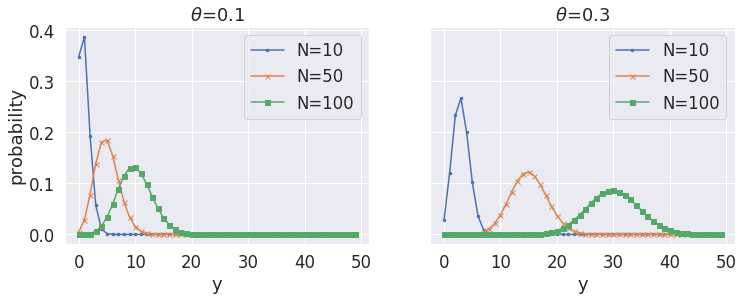

In [3]:
ys = np.arange(0, 50, 1)
ns = [10, 50, 100]
thetas = [0.1, 0.3]

fig = plt.figure(figsize=(12, 4))
ax = fig.subplots(1, 2, sharex=True, sharey=True)
for i, theta in enumerate(thetas):
    for j, n in enumerate(ns):
        # 確率質量関数を計算
        pmf = stats.binom.pmf(ys, n, p=theta)
        # Plot
        ax[i].plot(ys, pmf, label='N={}'.format(n), marker=markers[j%n_markers], markersize=5)
    ax[i].legend()
    ax[i].set_xlabel('y')
    ax[i].set_title('$\\theta$={}'.format(theta))
ax[0].set_ylabel('probability')


## 多項分布

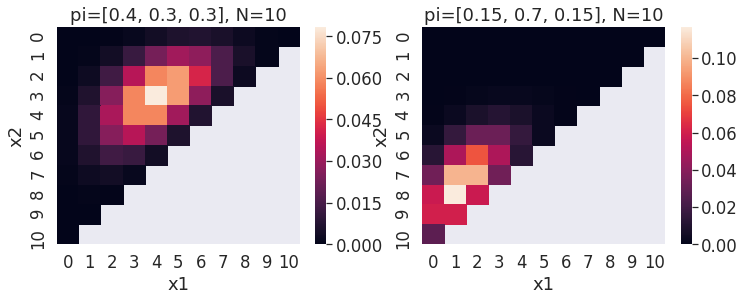

In [4]:
# 多項分布のパラメータ設定
pss = [[0.4, 0.3, 0.3], 
       [0.15, 0.7, 0.15]]
N = 10
# 確率質量を計算するグリッドの設定
# ## それぞれの組み合わせが実現値の回数を示す
x1 = np.arange(0,N+1)
x2 = np.arange(0,N+1)
xx1, xx2 = np.meshgrid(x1, x2)
xx3 = N - (xx1 + xx2)
# ## zipで組み合わせを取り出すためにreshapeする
res_xx1 = xx1.reshape((N+1)*(N+1))
res_xx2 = xx2.reshape((N+1)*(N+1))
res_xx3 = xx3.reshape((N+1)*(N+1))

# 実現値の和がNを超える場合には、nanを返す関数（defaultだと0が返る）
def get_multinomial_pmf(rv, x):
    if np.min(x) < 0:
        return np.nan
    return rv.pmf(x)

# 確率質量を計算してプロットする
fig = plt.figure(figsize=(12, 4))
ax = fig.subplots(1, 2)
for i, ps in enumerate(pss):
    rv = stats.multinomial(N, ps)
    pmfs = np.array([get_multinomial_pmf(rv, [s1,s2,s3]) for (s1, s2, s3) in zip(res_xx1, res_xx2, res_xx3)])
    pmfs = pmfs.reshape(N+1,N+1)
    sns.heatmap(pmfs, ax=ax[i])
    ax[i].set_xlabel('x1')
    ax[i].set_ylabel('x2')
    ax[i].set_title('pi={}, N={}'.format(ps, N))

## ベータ分布

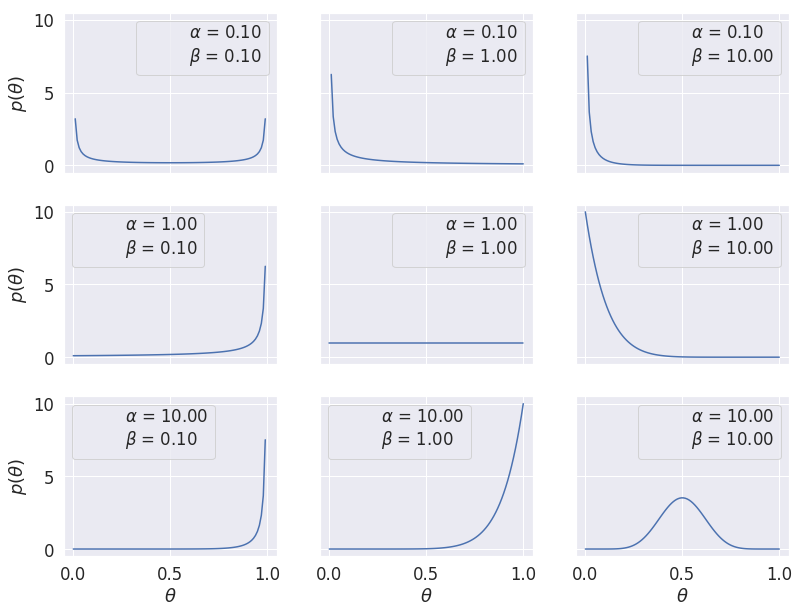

In [5]:
# ベータ分布のパラメータの設定
a_set = [0.1, 1, 10]
b_set = [0.1, 1, 10]
# 確率密度を計算するためのグリッドの設定
x = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(13, 10))
ax = fig.subplots(len(a_set), len(b_set), sharex=True, sharey=True)
cnt=0
for i in range(len(a_set)):
    for j in range(len(b_set)):
        a = a_set[i]
        b = b_set[j]
        # ベータ分布の確率密度を計算
        theta = stats.beta(a, b).pdf(x)
        # plot
        ax[i, j].plot(x, theta)
        ax[i, j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i, j].legend()
        if i == (len(a_set)-1):
            ax[i,j].set_xlabel('$\\theta$')
        if j == 0:
            ax[i,j].set_ylabel('$p(\\theta)$')

## ディリクレ分布

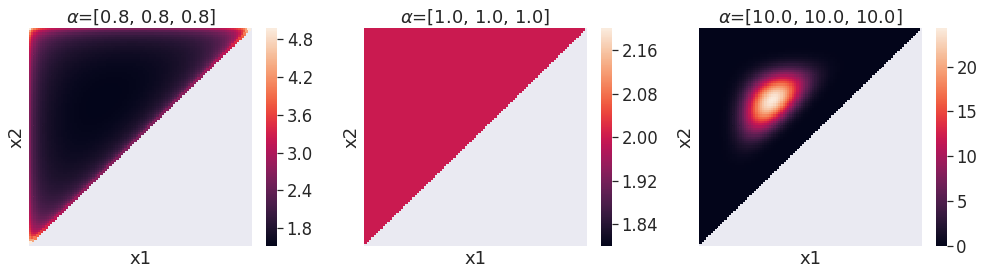

In [6]:
alphas = [[0.8, 0.8, 0.8], 
          [1.0, 1.0, 1.0], 
          [10.0, 10.0, 10.0]]

# 確率質量を計算するグリッドの設定
# ## それぞれの組み合わせが実現値の回数を示す
N=100
x1 = np.linspace(0, 1, N)[1:N-1]
x2 = np.linspace(0, 1, N)[1:N-1]
xx1, xx2 = np.meshgrid(x1, x2)
xx3 = 1.0 - (xx1 + xx2)

# ## zipで組み合わせを取り出すためにreshapeする
l = len(x1)
res_xx1 = xx1.reshape(l*l)
res_xx2 = xx2.reshape(l*l)
res_xx3 = xx3.reshape(l*l)

# 実現値の和がNを超える場合には、nanを返す関数（defaultだと0が返る）
def get_dirichlet_pdf(x, alpha):
    if np.min(x) <= 0:
        return np.nan
    return stats.dirichlet.pdf(x, alpha)

# 確率質量を計算してプロットする
fig = plt.figure(figsize=(17, 4))
ax = fig.subplots(1, 3)
for i, alpha in enumerate(alphas):
    pdfs = np.array([get_dirichlet_pdf([s1,s2,s3], alpha) for (s1, s2, s3) in zip(res_xx1, res_xx2, res_xx3)])
    pdfs = pdfs.reshape(l,l)
    sns.heatmap(pdfs, ax=ax[i], xticklabels=False, yticklabels=False)
    ax[i].set_xlabel('x1')
    ax[i].set_ylabel('x2')
    ax[i].set_title('$\\alpha$={}'.format(alpha))